Autor: Daniela Sánchez

Fecha: 08 Oct 2022

# Planteamiento 

🔍 Empleando el Breast Cancer Wisconsin (Diagnostic) [Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29), entrenaremos modelos con diferentes algoritmos de clasificación con el objetivo de obtener el modelo con la mejor exactitud.

# Importar librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

# Obtener datos

In [16]:
file = '/mnt/c/Users/danis/dataScripts/breastCancer/data/wdbc.data'
df = pd.read_csv(file, header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Nombrar las columnas en funcion a la explicación dada en el archivo wdbc.names

In [4]:
colNames = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
            'compactness_mean','concavity_mean','concavePoints_mean','symmetry _mean','fractalDimension_mean',
            'radius_SE','texture_SE','perimeter_SE','area_SE','smoothness_SE','compactness_SE','concavity_SE',
            'concavePoints_SE','symmetry _SE','fractalDimension_SE','worst_radius','worst_texture',
            'worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity',
            'worst_concavePoints','worst_symmetry ','worst_fractalDimension']

df.columns = colNames

df.isnull().sum()

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concavePoints_mean        0
symmetry _mean            0
fractalDimension_mean     0
radius_SE                 0
texture_SE                0
perimeter_SE              0
area_SE                   0
smoothness_SE             0
compactness_SE            0
concavity_SE              0
concavePoints_SE          0
symmetry _SE              0
fractalDimension_SE       0
worst_radius              0
worst_texture             0
worst_perimeter           0
worst_area                0
worst_smoothness          0
worst_compactness         0
worst_concavity           0
worst_concavePoints       0
worst_symmetry            0
worst_fractalDimension    0
dtype: int64

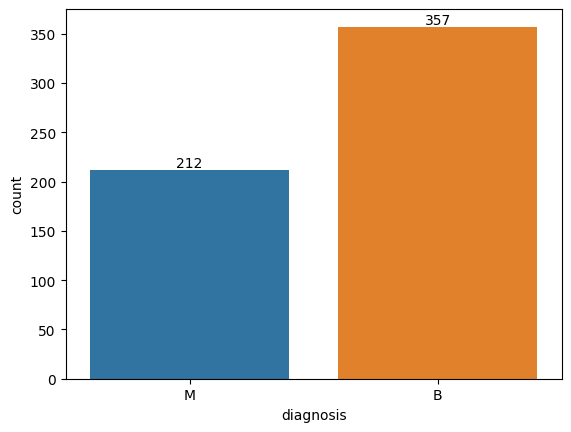

In [5]:
ax = sns.countplot(x='diagnosis',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Preprocesamiento

In [6]:
#Definir variables
x = df[df.columns.drop(["id","diagnosis"])]
y = df["diagnosis"]

Text(0.5, 1.0, 'Heatmap Matriz de Correlacion')

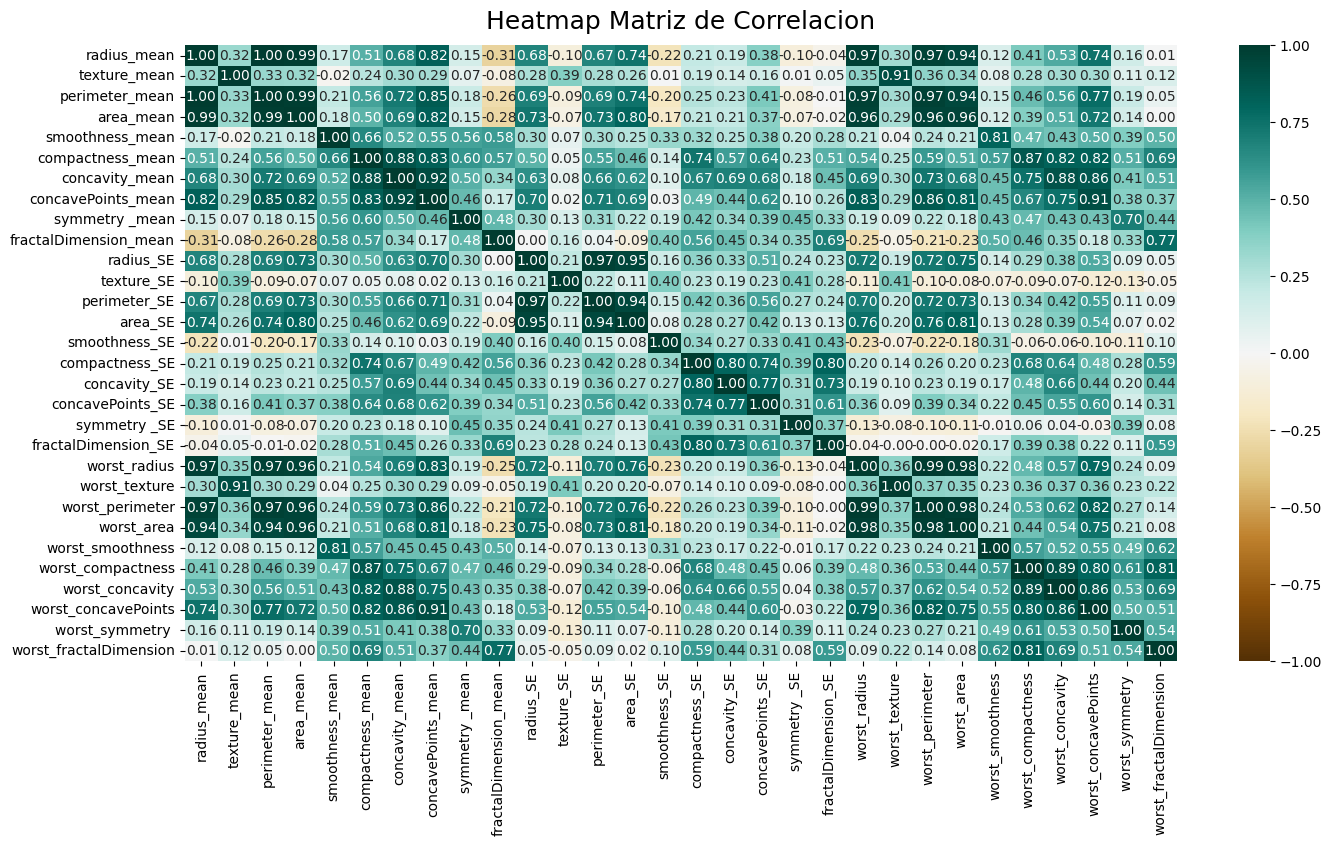

In [7]:
plt.figure(figsize=(16, 8))
h = sns.heatmap(x.corr(), annot=True, cmap='BrBG', vmin=-1, vmax=1, fmt=".2f")
h.set_title('Heatmap Matriz de Correlacion', fontdict={'fontsize':18}, pad=12)


👁️‍🗨️ Al observar la grafica, podemos determinar que existen variables que tienen una correlación mayor del 
0.95 entre si. Las variables correlacionadas son:

* radius_mean correlacionada con perimeter_mean y area_mean
* correlacionada con perimeter_SE y area_SE
* worst_radius correlacionada con worst_perimeter y worst_area

Para el modelamiento solamente mantendremos **radius_mean, radius_SE y worst_radius**


In [8]:
xFeatures = x[x.columns.drop(['perimeter_mean','area_mean',
                            'perimeter_SE','area_SE',
                            'worst_perimeter','worst_area'])]

xFeatures.shape

(569, 24)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(xFeatures, y, test_size=0.33,random_state=593)
print('Describe train:\n', Counter(y_train))
print('Describe test:\n', Counter(y_test))


Describe train:
 Counter({'B': 243, 'M': 138})
Describe test:
 Counter({'B': 114, 'M': 74})


# Modelamiento

In [10]:
def get_clf_name(clf):
    return re.sub('[^A-Za-z0-9]+', '', str(clf.__class__).split('.')[-1])

In [11]:
def run_experiment(X_train, y_train, X_test, y_test, clf):
      
    print(get_clf_name(clf))
    clf.fit(X_train, y_train)
    
    f, axes = plt.subplots(1, 2, figsize=(8, 2))
    # training confusion matrix
    y_pred = clf.predict(X_train)
    print("Accuracy Train: ", accuracy_score(y_train, y_pred))
    cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(ax=axes[0], xticks_rotation=45)
    disp.ax_.set_title("Train Results")
    
    
    
    # test confusion matrix
    y_pred = clf.predict(X_test)
    print("Accuracy Test: ", accuracy_score(y_test, y_pred))
    cmT = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cmT, display_labels=clf.classes_)
    disp.plot(ax=axes[1], xticks_rotation=45)
    disp.ax_.set_title("Test Results")

    plt.show()

In [12]:
randomState = 593
classifiers = { 
    "KNearest": KNeighborsClassifier(n_neighbors=3),
    "RandomForestClassifier": RandomForestClassifier(max_depth=4,random_state = randomState),
    "sgdcClassifier": SGDClassifier(loss='log_loss', random_state = randomState),
    "NaiveBayes": GaussianNB()}

KNeighborsClassifier
Accuracy Train:  0.9448818897637795
Accuracy Test:  0.9361702127659575


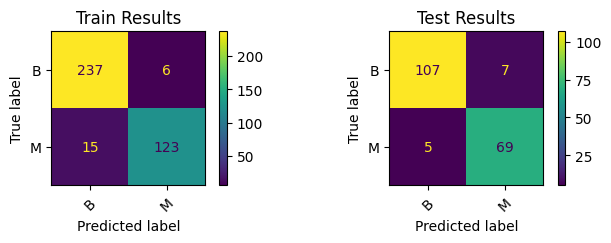

RandomForestClassifier
Accuracy Train:  0.989501312335958
Accuracy Test:  0.9893617021276596


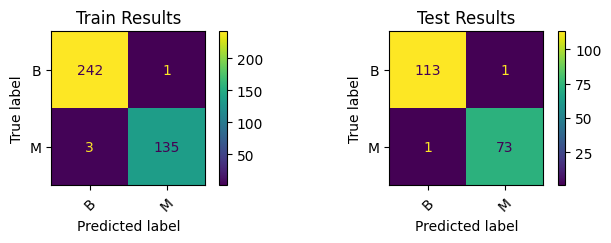

SGDClassifier
Accuracy Train:  0.9343832020997376
Accuracy Test:  0.9521276595744681


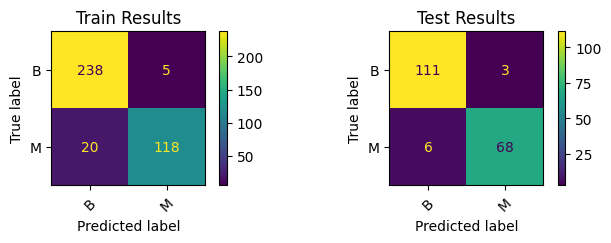

GaussianNB
Accuracy Train:  0.9186351706036745
Accuracy Test:  0.9627659574468085


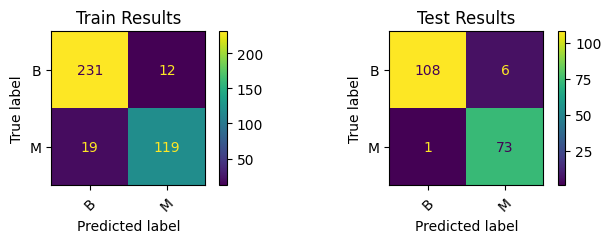

In [13]:
for key, classifier in classifiers.items():   
    run_experiment(X_train, y_train, X_test, y_test, classifier)

🏆 La mejor opcion es el modelo **Random Forest** con el cual obtuvimos una exactitud del 98% para los sets de test y train, ademas las menores tasas de falsos positivos y falsos negativos en el test set. 

Text(0.5, 1.0, 'Random Forest Feature Importance')

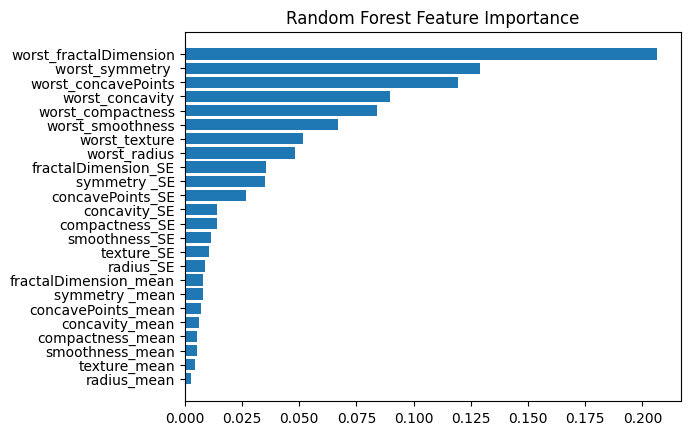

In [14]:
sorted_idx = classifiers['RandomForestClassifier'].feature_importances_.argsort()
plt.barh(X_train.columns, classifiers['RandomForestClassifier'].feature_importances_[sorted_idx])
plt.title("Random Forest Feature Importance")

💡 En resumen podemos observar que las 5 variables mas relevantes en nuestro modelo de Random Forest son
**worst_fractalDimension, worst_symmetry, worst_concavePoints, worst_concavity, worst_compactness**, es decir estas variables son las que tienen mas impacto en la clasficacion para determinar si un tumor es benigno o maligno.